## Assingmnet 3 

## EDA Analysis

## Testing Data

In [14]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of each dataset and their info
train_head = train_data.head()
test_head = test_data.head()
train_info = train_data.info()
test_info = test_data.info()

(train_head, test_head, train_info, test_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-n

(       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
 0  462809    Male           No   22        No     Healthcare              1.0   
 1  462643  Female          Yes   38       Yes       Engineer              NaN   
 2  466315  Female          Yes   67       Yes       Engineer              1.0   
 3  461735    Male          Yes   67       Yes         Lawyer              0.0   
 4  462669  Female          Yes   40       Yes  Entertainment              NaN   
 
   Spending_Score  Family_Size  Var_1 Segmentation  
 0            Low          4.0  Cat_4            D  
 1        Average          3.0  Cat_4            A  
 2            Low          1.0  Cat_6            B  
 3           High          2.0  Cat_6            B  
 4           High          6.0  Cat_6            A  ,
        ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
 0  458989  Female          Yes   36       Yes    Engineer              0.0   
 1  458994    Male          Y

## Statistical summaries for numerical and categorical columns

In [24]:
numerical_summary_train = train_data.describe()
categorical_summary_train = train_data.describe(include='object')

numerical_summary_test = test_data.describe()
categorical_summary_test = test_data.describe(include='object')

(numerical_summary_train, categorical_summary_train, numerical_summary_test, categorical_summary_test)


(                  ID          Age  Work_Experience  Family_Size
 count    8068.000000  8068.000000      8068.000000  8068.000000
 mean   463479.214551    43.466906         2.472980     2.856346
 std      2595.381232    16.711696         3.265248     1.499577
 min    458982.000000    18.000000         0.000000     1.000000
 25%    461240.750000    30.000000         0.000000     2.000000
 50%    463472.500000    40.000000         1.000000     3.000000
 75%    465744.250000    53.000000         4.000000     4.000000
 max    467974.000000    89.000000        14.000000     9.000000,
        Gender Ever_Married Graduated Profession Spending_Score  Var_1  \
 count    8068         8068      8068       8068           8068   8068   
 unique      2            2         2          9              3      7   
 top      Male          Yes       Yes     Artist            Low  Cat_6   
 freq     4417         4783      5046       2640           4878   5314   
 
        Segmentation  
 count          806

## Missing Value Imputation

In [25]:
from sklearn.impute import SimpleImputer

# Imputers for categorical and numerical data
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

# Columns to impute
categorical_columns = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']
numerical_columns = ['Work_Experience', 'Family_Size']

# Impute categorical data
train_data[categorical_columns] = categorical_imputer.fit_transform(train_data[categorical_columns])
test_data[categorical_columns] = categorical_imputer.transform(test_data[categorical_columns])

# Impute numerical data
train_data[numerical_columns] = numerical_imputer.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = numerical_imputer.transform(test_data[numerical_columns])

# Check if there are any missing values left
missing_values_train = train_data.isnull().sum()
missing_values_test = test_data.isnull().sum()

(missing_values_train, missing_values_test)


(ID                 0
 Gender             0
 Ever_Married       0
 Age                0
 Graduated          0
 Profession         0
 Work_Experience    0
 Spending_Score     0
 Family_Size        0
 Var_1              0
 Segmentation       0
 dtype: int64,
 ID                 0
 Gender             0
 Ever_Married       0
 Age                0
 Graduated          0
 Profession         0
 Work_Experience    0
 Spending_Score     0
 Family_Size        0
 Var_1              0
 dtype: int64)

## Data Preparation

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.utils import to_categorical
# Combine train and test data to apply the same transformations
all_data = pd.concat([train_data, test_data], ignore_index=True)

# Define numerical and categorical features
numerical_cols = ['Age', 'Work_Experience', 'Family_Size']
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

# Preprocessing for numerical data: normalization
numerical_transformer = StandardScaler()

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply transformations
all_data_prepared = pipeline.fit_transform(all_data)

# Split the data back into train and test
X = all_data_prepared[:len(train_data)]
X_test = all_data_prepared[len(train_data):]
y = to_categorical(train_data['Segmentation'].astype('category').cat.codes)

# Shuffle and split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Design and Train the Neural Network

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC

# Define the model using the recommended Input layer
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Use Input layer to specify input shape
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', AUC(name='auc')])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_auc', patience=10, mode='max', restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping], batch_size=32)


Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3608 - auc: 0.6172 - loss: 1.3419 - val_accuracy: 0.4913 - val_auc: 0.7652 - val_loss: 1.1359
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.4716 - auc: 0.7442 - loss: 1.1708 - val_accuracy: 0.5093 - val_auc: 0.7777 - val_loss: 1.1131
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.4906 - auc: 0.7588 - loss: 1.1421 - val_accuracy: 0.5136 - val_auc: 0.7818 - val_loss: 1.0974
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.4893 - auc: 0.7514 - loss: 1.1559 - val_accuracy: 0.5211 - val_auc: 0.7863 - val_loss: 1.0881
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.5116 - auc: 0.7743 - loss: 1.1129 - val_accuracy: 0.5161 - val_auc: 0.7852 - val_loss: 1.0892
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.5188 - auc: 0.7750 - loss: 1.1077 - val_accuracy: 0.5087 - val_auc: 0.7858 - val_loss: 1.0883
Epoch 7/100
202/202 ━━━━

## Evaluate the Model on Test Data

In [21]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np

# Predict the test set results
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to labels

# Assuming you've already trained your model and have `X_val` and `y_val` ready

# Predict the validation set results
y_val_pred = model.predict(X_val)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)  # Convert probabilities to labels
y_val_true_labels = np.argmax(y_val, axis=1)  # True labels

# Classification report including precision, recall, f1-score for the validation set
print(classification_report(y_val_true_labels, y_val_pred_labels))

# Confusion Matrix
print(confusion_matrix(y_val_true_labels, y_val_pred_labels))

# If you want to compute the ROC-AUC score, ensure you have the true probabilities and not just labels
# ROC-AUC score
roc_auc_val = roc_auc_score(to_categorical(y_val_true_labels), y_val_pred, multi_class='ovr')
print("ROC-AUC Score on Validation Set:", roc_auc_val)


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
              precision    recall  f1-score   support

           0       0.42      0.49      0.45       391
           1       0.43      0.25      0.31       369
           2       0.53      0.60      0.56       380
           3       0.67      0.71      0.69       474

    accuracy                           0.53      1614
   macro avg       0.51      0.51      0.50      1614
weighted avg       0.52      0.53      0.52      1614

[[193  54  58  86]
 [112  91 134  32]
 [ 48  54 228  50]
 [111  11  14 338]]
ROC-AUC Score on Validation Set: 0.7848649247756131


In machine learning, particularly in classification tasks, several performance metrics are crucial for evaluating the effectiveness and accuracy of models. Each metric offers unique insights into different aspects of the model's performance. Here's an overview of the most commonly used metrics and what they denote, particularly in the context of multiclass classification:

### 1. **Accuracy**
- **Definition**: Accuracy measures the overall correctness of the model across all classes. It is the ratio of correct predictions (both true positives and true negatives) to the total number of cases examined.
- **Significance**: In multiclass classification, accuracy is a straightforward indicator of overall performance. However, its usefulness can be limited in imbalanced datasets where the sheer number of instances in one class might overshadow the performance in less frequent classes.

### 2. **Precision**
- **Definition**: Precision (or positive predictive value) is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question, "Of all the instances classified as a specific class, how many are actually that class?"
- **Significance**: High precision indicates a low rate of false positives. In multiclass scenarios, precision is usually calculated for each class separately and then averaged (macro-average), which can highlight how well the model performs for each class without being biased by class imbalances.

### 3. **Recall (Sensitivity)**
- **Definition**: Recall is the ratio of correctly predicted positive observations to all observations in the actual class. It answers the question, "Of all the instances that truly belong to a specific class, how many did we correctly classify?"
- **Significance**: Recall is particularly important in situations where missing a positive instance (e.g., not detecting a disease in a patient) is more critical than falsely identifying one. In multiclass classification, recall provides insights into the model’s ability to capture all relevant instances in each class. 

### 4. **Confusion Matrix**
- **Definition**: A confusion matrix is a table used to describe the performance of a classification model on a set of test data for which the true values are known. It lists each class and the instances of true positives, false positives, true negatives, and false negatives.
- **Significance**: In multiclass classification, the matrix provides a clear visualization of performance across all classes. It shows how any class is confused with the others, which can be critical for improving the model and focusing on specific areas where the model is weak.

## Plot Loss and F1-Score Curves

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/stepep - accuracy: 0.5451 - auc: 0.8043 - loss: 1.039
 - val_f1: 0.4032
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5433 - auc: 0.8030 - loss: 1.0426 - val_accuracy: 0.5285 - val_auc: 0.7946 - val_loss: 1.0604
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/stepep - accuracy: 0.5484 - auc: 0.8080 - loss: 1.036
 - val_f1: 0.4115
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5475 - auc: 0.8072 - loss: 1.0381 - val_accuracy: 0.5242 - val_auc: 0.7940 - val_loss: 1.0624
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/stepep - accuracy: 0.5333 - auc: 0.7976 - loss: 1.056
 - val_f1: 0.4122
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5354 - auc: 0.7983 - loss: 1.0542 - val_accuracy: 0.5198 - val_auc: 0.7922 - val_loss: 1.0673
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/stepep - accuracy: 0.5472 - auc: 0.8024 - loss: 1.037
 - val_f1: 0.4118
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5459 - auc: 0.8022

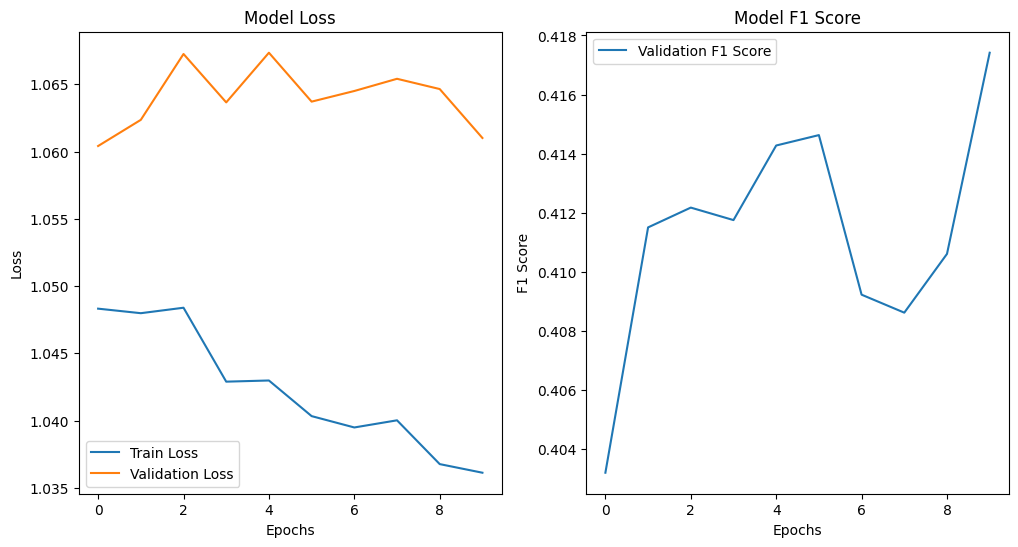

In [22]:
from tensorflow.keras.callbacks import Callback
import numpy as np
from sklearn.metrics import f1_score

class F1ScoreCallback(Callback):
    def __init__(self, validation_data):
        super(F1ScoreCallback, self).__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []

    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(np.argmax(val_targ, axis=1), np.argmax(val_predict, axis=1), average='macro')
        self.val_f1s.append(_val_f1)
        print(f' - val_f1: {_val_f1:.4f}')

# Now update the model.fit to use this callback
f1_callback = F1ScoreCallback(validation_data=(X_val, y_val))

history = model.fit(
    X_train, y_train, 
    epochs=100, 
    validation_data=(X_val, y_val), 
    callbacks=[early_stopping, f1_callback],
    batch_size=32
)

# Plotting Loss and F1 Score
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot F1 Score
plt.subplot(1, 2, 2)
plt.plot(f1_callback.val_f1s, label='Validation F1 Score')
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epochs')
plt.legend()

plt.show()


## ROC-AUC Curve Using Validation Data

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


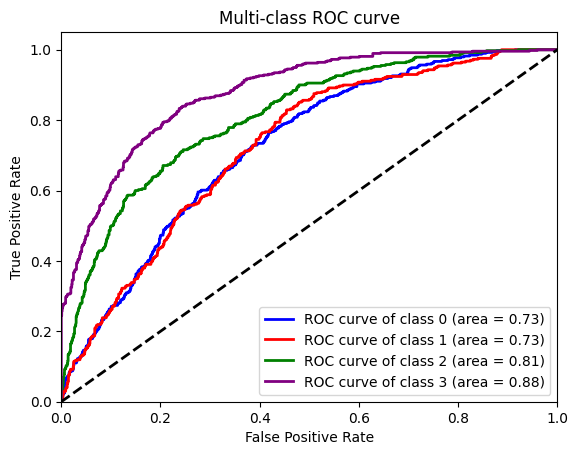

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming model.predict(X_val) is already executed and stored in y_val_pred if not execute the line below
# y_val_pred = model.predict(X_val)

# Compute true labels and predicted probabilities for the validation set
y_val_true_labels = np.argmax(y_val, axis=1)  # True labels from y_val
y_val_pred_probs = model.predict(X_val)  # Predicted probabilities

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_val.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_val_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting all ROC curves
colors = cycle(['blue', 'red', 'green', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curve')
plt.legend(loc="lower right")
plt.show()


### 5. **F1 Score**
- **Definition**: The F1 Score is the weighted average of Precision and Recall. It takes both false positives and false negatives into account. It is calculated by the harmonic mean of precision and recall: \( F1 = 2 \times \frac{precision \times recall}{precision + recall} \).
- **Significance**: The F1 score is particularly useful because it balances the precision and recall, which is important when you have classes that are imbalanced. It is especially useful when the costs of false positives and false negatives differ.

### 6. **ROC-AUC Curve**
- **Definition**: The ROC (Receiver Operating Characteristic) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied. The AUC (Area Under the Curve) represents a measure of separability or the capability of the model to distinguish between classes.
- **Significance**: For multiclass classification, ROC curves can be extended to plot and analyze the performance for each class against all others. A higher AUC value indicates a better performing model. Each class will have its own AUC metric, which can be averaged to provide a single performance score.

##  Training set

In [26]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


## Data Preparation and Split

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

# Load the data
train_data = pd.read_csv('train.csv')  # Update path as needed

# Define numerical and categorical columns
numerical_cols = ['Age', 'Work_Experience', 'Family_Size']
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

# Preprocessing for numerical data: Imputation + normalization
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: Imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply transformations
X = pipeline.fit_transform(train_data)
y = to_categorical(train_data['Segmentation'].astype('category').cat.codes)  # Adjust as per actual column

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("After SMOTE, counts of label '1': {}".format(sum(y_train_smote==1)))


After SMOTE, counts of label '1': [1794 1794 1794 1794]


##  Train the Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Define the model
model = Sequential([
    Input(shape=(X_train_smote.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train_smote.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=100, validation_data=(X_val, y_val), batch_size=32)


Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3385 - loss: 1.3370 - val_accuracy: 0.4938 - val_loss: 1.1469
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.4702 - loss: 1.1707 - val_accuracy: 0.5099 - val_loss: 1.1153
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.4816 - loss: 1.1467 - val_accuracy: 0.5031 - val_loss: 1.1124
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.4998 - loss: 1.1435 - val_accuracy: 0.5087 - val_loss: 1.1009
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.5048 - loss: 1.1222 - val_accuracy: 0.5012 - val_loss: 1.1061
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.4941 - loss: 1.1146 - val_accuracy: 0.5087 - val_loss: 1.0940
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.5225 - loss: 1.1053 - val_accuracy: 0.5248 - val_loss: 1.0837
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.5190 - loss: 1.0

## Define and Train the Neural Network

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Define the neural network
model_smote = Sequential([
    Input(shape=(X_train_smote.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train_smote.shape[1], activation='softmax')
])

# Compile the model
model_smote.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_smote = model_smote.fit(
    X_train_smote, y_train_smote,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    batch_size=32
)


Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3362 - loss: 1.3610 - val_accuracy: 0.4994 - val_loss: 1.1390
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.4544 - loss: 1.2031 - val_accuracy: 0.5056 - val_loss: 1.1089
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.4905 - loss: 1.1466 - val_accuracy: 0.5099 - val_loss: 1.1028
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.5000 - loss: 1.1247 - val_accuracy: 0.5105 - val_loss: 1.1014
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.5071 - loss: 1.1156 - val_accuracy: 0.5180 - val_loss: 1.0863
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.5088 - loss: 1.1002 - val_accuracy: 0.5217 - val_loss: 1.0834
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.5117 - loss: 1.1039 - val_accuracy: 0.5180 - val_loss: 1.0838
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.5103 - loss: 1.0

## Evaluate Model Performance

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# Prediction and evaluation
y_val_pred = model_smote.predict(X_val)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
y_val_true_labels = np.argmax(y_val, axis=1)

# Print classification report
print(classification_report(y_val_true_labels, y_val_pred_labels))

# Print confusion matrix
print(confusion_matrix(y_val_true_labels, y_val_pred_labels))


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
              precision    recall  f1-score   support

           0       0.43      0.46      0.44       391
           1       0.42      0.33      0.37       369
           2       0.57      0.59      0.58       380
           3       0.65      0.72      0.68       474

    accuracy                           0.53      1614
   macro avg       0.52      0.52      0.52      1614
weighted avg       0.53      0.53      0.53      1614

[[178  74  48  91]
 [ 94 122 116  37]
 [ 39  67 223  51]
 [101  27   7 339]]


##  Plot Loss and Accuracy Curves

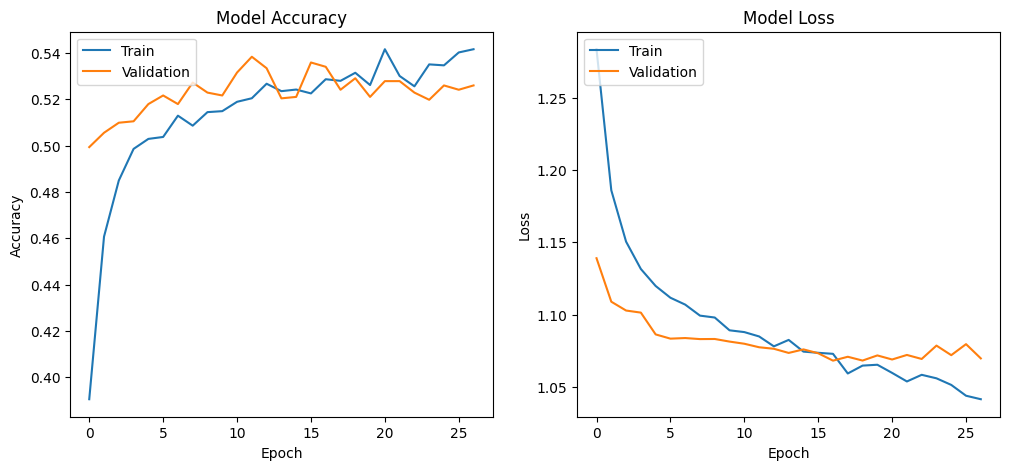

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_smote.history['accuracy'])
plt.plot(history_smote.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_smote.history['loss'])
plt.plot(history_smote.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


## ROC-AUC Curve

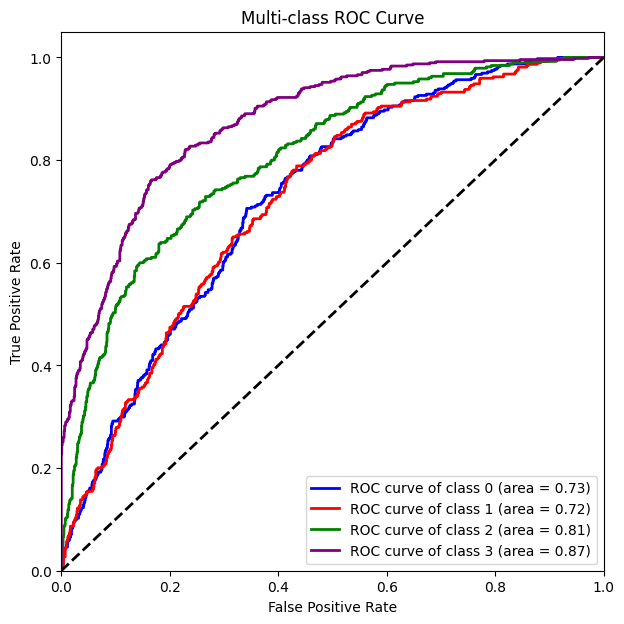

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output labels for multiclass ROC
y_val_bin = label_binarize(y_val_true_labels, classes=[0, 1, 2, 3])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_train_smote.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(7, 7))
colors = cycle(['blue', 'red', 'green', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()


To effectively implement and evaluate the impact of oversampling on your dataset, particularly focusing on increasing the instances of the majority class as mentioned (which is an unusual approach since oversampling is typically used to increase minority class instances), we need a clear strategy. This involves using oversampling techniques to artificially increase the dataset size and potentially improve model performance, especially in handling imbalanced datasets. Let’s discuss the approach, implementation, and expected results:

### Overview
Typically, oversampling is used to balance class distribution by increasing the number of instances in under-represented classes. However, increasing the majority class instances can also be explored to study its effects on model performance, possibly leading to better generalization in some specific cases or causing the model to overfit.

### Libraries and Methods for Oversampling
- **imbalanced-learn (SMOTE):** This library offers several oversampling techniques, including SMOTE (Synthetic Minority Over-sampling Technique) which is generally used to increase the number of minority class instances by creating synthetic examples rather than over-sampling with replacement.
- **Adaptive Synthetic (ADASYN):** This method is similar to SMOTE but with a focus on generating more samples next to the borderline rather than randomly across the minority class distribution.


### Comparison and Commentary

- **Effect on Model Metrics:** Oversampling the majority class might decrease the model's ability to generalize to the minority classes due to increased bias towards the majority class. This could lead to higher accuracy but lower recall and F1-scores for minority classes.
- **Learning Curves:** Compare the learning curves for training on original vs. oversampled data. Look for signs of overfitting, such as divergence of training and validation loss.
- **ROC-AUC Curves:** These will show whether the model’s ability to discriminate between classes has improved or worsened.


This experimental approach to oversampling the majority class is unconventional since it typically may lead to overfitting and reduce the model's generalizability. However, it could provide insights into model behavior under different training conditions and help in understanding the dynamics of class imbalance further. It’s crucial to carefully interpret the results, especially looking at how the model performs on minority classes and overall balance between sensitivity and specificity.

Training data and testing data serve different purposes in the context of building and evaluating machine learning models. Here's how they differ and why each is important:

### Training Data
1. **Purpose**: Training data is used to teach or train a machine learning model. This is the dataset on which the learning algorithm creates its understanding of how to make predictions, classify data, or output a continuous value, depending on the type of model (e.g., classification, regression).
2. **Usage**: The model uses this data to adjust its weights and biases (in the case of neural networks) or define its decision criteria (in decision trees, for instance) based on the features provided and the outcomes or labels associated with each data point.
3. **Impact**: The quality and quantity of training data directly influence the model's ability to learn. Insufficient or biased training data can lead to underfitting or overfitting:
   - **Underfitting** occurs when the model is too simple to learn the underlying pattern of the data.
   - **Overfitting** occurs when the model learns the training data too well, including the noise and outliers, which harms its performance on any new data.

### Testing Data
1. **Purpose**: Testing data is used to evaluate the performance of a trained model. This data set is used to assess how well the model generalizes to new, unseen data.
2. **Usage**: After the model has been trained using the training data, the testing data is used to provide an unbiased evaluation. This dataset should not be used during the training phase and must be kept separate to ensure that the evaluation is valid.
3. **Impact**: Testing data helps to realistically simulate how the model is expected to perform in the real world. It provides metrics on the effectiveness of the model, including accuracy, precision, recall, F1-score, and others, depending on the task.
4. **Selection**: The selection and quality of testing data are crucial. It should ideally follow the same distribution as the training data and encompass all expected variations to effectively test all aspects of the model.

### Key Differences:
- **Exposure**: Training data is used to fit the model; testing data is used to evaluate it. The model should not have seen the testing data during training to ensure that the evaluation is fair and indicative of real-world performance.
- **Function**: The main function of training data is to build the model's capability to predict or classify, while the testing data is to verify its effectiveness in doing so under realistic conditions.
- **Volume**: Typically, the majority of the dataset is allocated to training to give the model a comprehensive learning base, and a smaller portion is reserved for testing. A common split might be 80% for training and 20% for testing, although this can vary depending on the size and characteristics of the dataset.

### Conclusion
The distinction between training and testing data is fundamental in machine learning. Proper handling, partitioning, and usage of these datasets are critical for developing robust, effective models.